/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


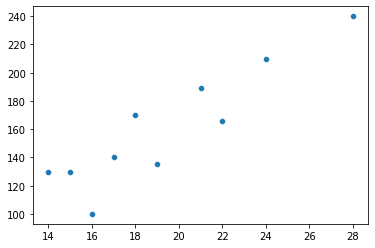

In [123]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#importing libraries

x=np.array([17,21,24,28,14,16,19,22,15,18])
y=np.array([140,189,210,240,130,100,135,166,130,170])
y_mean=sum(y)/len(y)
sns.scatterplot(x,y)
#Task 1- Positive association by the scatterplot


In [124]:
#Function for calculating the slope and intercept of the line
def slope_intercept(x,y):
  x_mean=sum(x)/10
  y_mean=sum(y)/10

  x_deviation=(x-x_mean)
  y_deviation=(y-y_mean)
  xx_sum=sum(x**2)
  yy_sum=sum(y**2)
  xy_sum=sum(x*y)
  x_y_deviation_prod=sum(x_deviation*y_deviation)
  xx_deviation=sum((x-x_mean)**2)
  slope=x_y_deviation_prod/xx_deviation
  intercept=y_mean-(slope*x_mean)
  return slope,intercept
  

slope,intercept=slope_intercept(x,y)

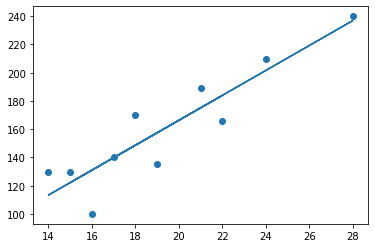

In [125]:
#Scater plot of x and y and the plotting of regression line together
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,(x*slope)+intercept)

In [126]:
#y_predictor is to calculate the predicted value from the calculated slope and intercept
def y_predictor(slope,intercept):
  xi=float(input("ENTER THE X VALUES: "))
  yi=intercept+slope*xi
  return yi

#y_predicted returns the predicted value of y from regression equation
y_predicted=y_predictor(slope,intercept)
print(y_predicted)

ENTER THE X VALUES: 27
228.0951276102088


In [127]:
#y_predicted_list returns the list predicted values of y calculated from x
def y_predicted_list(x,y,slope,intercept,y_mean):
  y_pred_list=intercept+slope*x
  return y_pred_list


y_pred_list=y_predicted_list(x,y,slope,intercept,y_mean)

In [128]:
#function to calculate R square
def r_square(y,y_mean,y_pred_list):
  r_square_1=sum(((y-y_mean)**2)-((y-y_pred_list)**2))/sum((y-y_mean)**2)
  return r_square_1

r_square_calc=r_square(y,y_mean,y_pred_list)
print(r_square_calc)

0.8247411081862733


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


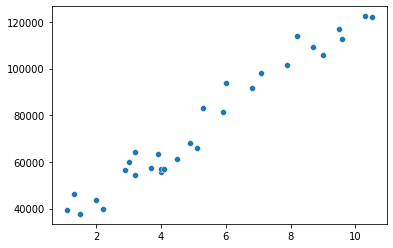

In [129]:
#Using salary dataset
salary_df=pd.read_csv('Salary_Data.csv')

xi = np.array(salary_df['YearsExperience'])
yi = np.array(salary_df['Salary'])

#Scatter plot of years of experience and salary
sns.scatterplot(xi,yi)

Positive correlation between the two features means as the experience increases the salary also increases

Text(0, 0.5, 'Salary')

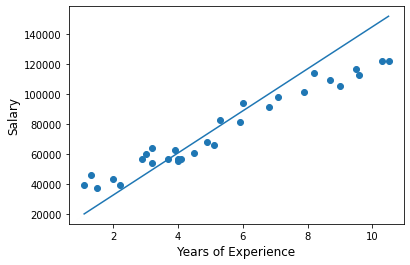

In [130]:
#Scatter plot of years of Experience and plotting the linear regression line on the same graph
slope,intercept=slope_intercept(xi,yi)
plt.scatter(xi,yi)
plt.plot(xi,xi*slope+intercept)
plt.xlabel("Years of Experience",fontsize=12)
plt.ylabel("Salary",fontsize=12)

In [131]:
#predicting the value of salary from the yrars of experience
salary_predicted_val=y_predictor(slope,intercept)
print(f"the predicted value of Salary is: {salary_predicted_val}")

ENTER THE X VALUES: 4
the predicted value of Salary is: 60954.86543087966


In [132]:
salary_mean=sum(yi)/len(yi)

salary_pred_list=y_predicted_list(xi,yi,slope,intercept,salary_mean)

r_square_calc=r_square(yi,salary_mean,salary_pred_list)
print(r_square_calc)

0.7207341303230459


In [135]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import r2_score


In [136]:
salary_df.dropna(inplace = True)
X=xi.reshape(-1,1)
y=yi.reshape(-1,1)
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9024461774180497


In [137]:
regr_1=LinearRegression().fit(X,y)

In [138]:
slope=regr.coef_
slope=regr_1.coef_
print(slope[0][0])

9449.962321455076


In [140]:
intercept=regr_1.intercept_
print(intercept[0])

25792.200198668696


In [143]:
y_predicted=intercept + slope*float(input())
print(f"The predicted value of the salary is: {y_predicted[0][0]}")

4
The predicted value of the salary is: 63592.049484489


In [144]:
r2_score(yi,salary_pred_list)

0.7207341303230458